In [1]:
from sympy import Symbol, Rational, init_printing, sqrt, expand, simplify, factor, factorial2, oo, limit, besselj, jn, factorial, expand_func, series
init_printing(use_latex=True)
from sympy import gamma as gamma_F
from IPython.display import display as disp

In [2]:
w2 = Symbol('\\omega^2', real=True, positive=True)
gamma = Symbol('\\gamma', real=True, positive=True)
alpha2 = Symbol('\\alpha^2', real=True, positive=True)
beta2 = Symbol('\\beta^2', real=True, positive=True)
l = Symbol('l', integer=True)
r = Symbol('r', real=True, positive=True)
x = Symbol('x', real=True, positive=True)
shear = Symbol('\\mu', positive=True)
bulk = Symbol('K', positive=True)
density = Symbol('\\rho', real=True, positive=True)
lame = Symbol('\\lambda')

k_inner_nonsqrt = ((w2 + 4 * gamma) / alpha2) + (w2 / beta2)
k_inner_sqrt = ((w2 / beta2) - ((w2 + 4 * gamma) / alpha2))**2 + ((4 * l * (l + 1) * gamma**2) / (alpha2 * beta2))
k_pos = Rational(1, 2) * (k_inner_nonsqrt + sqrt(k_inner_sqrt))
k_neg = Rational(1, 2) * (k_inner_nonsqrt - sqrt(k_inner_sqrt))

f_kpos = (beta2 * k_pos - w2) / gamma
f_kneg = (beta2 * k_neg - w2) / gamma

h_kpos = f_kpos - (l + 1)
h_kneg = f_kneg - (l + 1)

# Phi and Psi functions are found via bessel functions on "kr". 
def Phi_real(x, n):
    return factorial2(2 * n + 1) * besselj(n, x)/ x**n

def Phi_approx(k2, n):
    return 1 - (1 / (2 * (2 * n + 3))) * k2 * r**2 + (1 / (2**2 * (2 * n + 3) * (2 * n + 5) * 2)) * k2**2 * r**4

def Psi_real(x, n):
    return 2 * (2 * n + 3) * (1 - Phi(x))/ x**2

def Psi_approx(k2, n):
    return 1 - (1 / (2 * (2 * n + 5) * 2)) * k2 * r**2 + (1 / (2**2 * (2 * n + 5) * (2 * n + 7) * 3)) * k2**2 * r**4

In [3]:
disp(series(Phi_real(x, 2), x, 0))

C:\ProgramData\Anaconda3\envs\arpy\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\envs\arpy\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\envs\arpy\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\envs\arpy\lib\site-packages\IPython\lib\latextools.py:126: Matpl

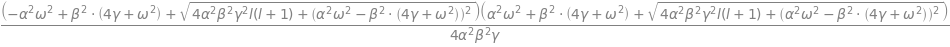

In [4]:
disp(simplify((k_pos * f_kpos * alpha2)))

In [5]:
# Confirms Kamata+ (2015) result just before their Eq. B17
disp(simplify(limit(k_pos * f_kpos * alpha2, alpha2, oo)))

## Perform Limits on T&S initial conditions

In [22]:
def find_ys(kpos, kneg):
    
    f_kpos_ = (beta2 * kpos - w2) / gamma
    f_kneg_ = (beta2 * kneg - w2) / gamma

    h_kpos_ = f_kpos_ - (l + 1)
    h_kneg_ = f_kneg_ - (l + 1)

    
    y1_s1 = - (r**(l + 1) / (2 * l + 3)) * (Rational(1, 2) * l * h_kneg_ * Psi_approx(kneg, l) + \
                                        f_kneg_ * Phi_approx(kneg, l + 1))
    y1_s2 = - (r**(l + 1) / (2 * l + 3)) * (Rational(1, 2) * l * h_kpos_ * Psi_approx(kpos, l) + \
                                            f_kpos_ * Phi_approx(kpos, l + 1))
    y1_s3 = l * r**(l-1)

    y2_s1 = -r**(l) * (lame + 2 * shear) * f_kneg_ * Phi_approx(kneg, l) + \
             (r**l * shear / (2 * l + 3)) * (-l * (l - 1) * h_kneg_ * Psi_approx(kneg, l) + \
                                             2 * (2 * f_kneg_ + l * (l + 1)) * Phi_approx(kneg, l + 1))
    y2_s2 = -r**(l) * (lame + 2 * shear) * f_kpos_ * Phi_approx(kpos, l) + \
             (r**l * shear / (2 * l + 3)) * (-l * (l - 1) * h_kpos_ * Psi_approx(kpos, l) + \
                                             2 * (2 * f_kpos_ + l * (l + 1)) * Phi_approx(kpos, l + 1))
    y2_s3 = 2 * shear * l * (l - 1) * r**(l-2)

    y3_s1 = -(r**(l+1) / (2 * l + 3)) * (Rational(1, 2) * h_kneg_ * Psi_approx(kneg, l) - Phi_approx(kneg, l + 1))
    y3_s2 = -(r**(l+1) / (2 * l + 3)) * (Rational(1, 2) * h_kpos_ * Psi_approx(kpos, l) - Phi_approx(kpos, l + 1))
    y3_s3 = r**(l-1)

    y4_s1 = shear * r**(l) * (Phi_approx(kneg, l) - (1 / (2 * l + 3)) * ((l - 1) * h_kneg_ * Psi_approx(kneg, l) + \
                                                      2 * (f_kneg_ + 1) * Phi_approx(kneg, l + 1)))
    y4_s2 = shear * r**(l) * (Phi_approx(kpos, l) - (1 / (2 * l + 3)) * ((l - 1) * h_kpos_ * Psi_approx(kpos, l) + \
                                                      2 * (f_kpos_ + 1) * Phi_approx(kpos, l + 1)))
    y4_s3 = 2 * shear * (l - 1) * r**(l - 2)

    y5_s1 = r**(l + 2) * (((alpha2 * f_kneg_ - (l + 1) * beta2) / r**2) - \
                          (3 * gamma * f_kneg_ / (2 * (2 * l + 3))) * Psi_approx(kneg, l))
    y5_s2 = r**(l + 2) * (((alpha2 * f_kpos_ - (l + 1) * beta2) / r**2) - \
                          (3 * gamma * f_kpos_ / (2 * (2 * l + 3))) * Psi_approx(kpos, l))
    y5_s3 = (l * gamma - w2) * r**l

    y6_s1 = ((2 * l + 1) * y5_s1 / r) + (3 * l * gamma * h_kneg_ * r**(l + 1) / (2 * (2 * l + 3))) * Psi_approx(kneg, l)
    y6_s2 = ((2 * l + 1) * y5_s2 / r) + (3 * l * gamma * h_kpos_ * r**(l + 1) / (2 * (2 * l + 3))) * Psi_approx(kpos, l)
    y6_s3 = ((2 * l + 1) * y5_s3 / r) - 3 * l * gamma * r**(l-1)


    ys = {
        '$y_{1}$': {
            '\tsol1': y1_s1,
            '\tsol2': y1_s2,
            '\tsol3': y1_s3
        },
        '$y_{2}$': {
            '\tsol1': y2_s1,
            '\tsol2': y2_s2,
            '\tsol3': y2_s3
        },
        '$y_{3}$': {
            '\tsol1': y3_s1,
            '\tsol2': y3_s2,
            '\tsol3': y3_s3
        },
        '$y_{4}$': {
            '\tsol1': y4_s1,
            '\tsol2': y4_s2,
            '\tsol3': y4_s3
        },
        '$y_{5}$': {
            '\tsol1': y5_s1,
            '\tsol2': y5_s2,
            '\tsol3': y5_s3
        },
        '$y_{6}$': {
            '\tsol1': y6_s1,
            '\tsol2': y6_s2,
            '\tsol3': y6_s3
        }
    }
    
    return ys

### Incompressibility

'$y_{1}$'

	sol1
Incomp - on final


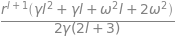

Incomp - on initk


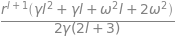

DIFF


~~~
	sol2
Incomp - on final


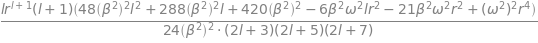

Incomp - on initk


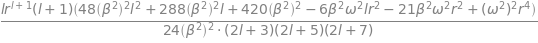

DIFF


~~~
	sol3
Incomp - on final


Incomp - on initk


DIFF


~~~






'$y_{2}$'

	sol1
Incomp - on final


Incomp - on initk


DIFF


nan

~~~
	sol2
Incomp - on final


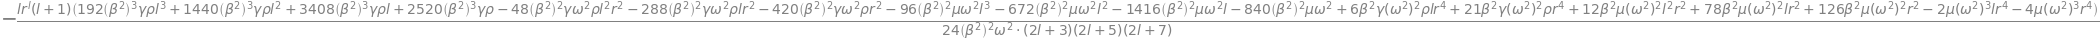

Incomp - on initk


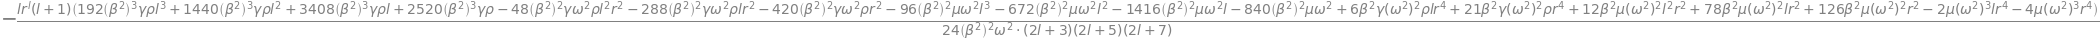

DIFF


~~~
	sol3
Incomp - on final


Incomp - on initk


DIFF


~~~






'$y_{3}$'

	sol1
Incomp - on final


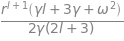

Incomp - on initk


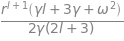

DIFF


~~~
	sol2
Incomp - on final


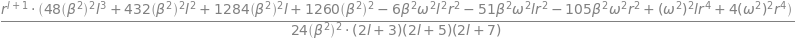

Incomp - on initk


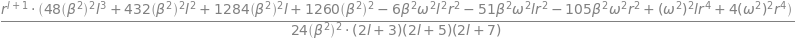

DIFF


~~~
	sol3
Incomp - on final


Incomp - on initk


DIFF


~~~






'$y_{4}$'

	sol1
Incomp - on final


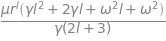

Incomp - on initk


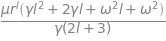

DIFF


~~~
	sol2
Incomp - on final


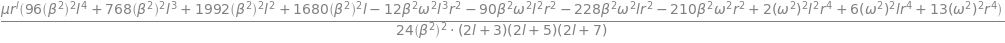

Incomp - on initk


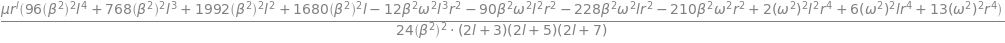

DIFF


~~~
	sol3
Incomp - on final


Incomp - on initk


DIFF


~~~






'$y_{5}$'

	sol1
Incomp - on final


Incomp - on initk


DIFF


nan

~~~
	sol2
Incomp - on final


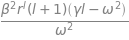

Incomp - on initk


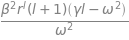

DIFF


~~~
	sol3
Incomp - on final


Incomp - on initk


DIFF


~~~






'$y_{6}$'

	sol1
Incomp - on final


Incomp - on initk


DIFF


nan

~~~
	sol2
Incomp - on final


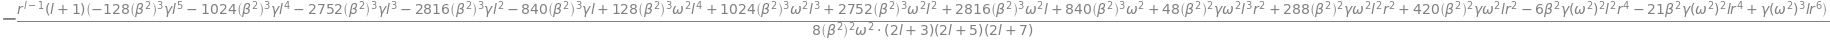

Incomp - on initk


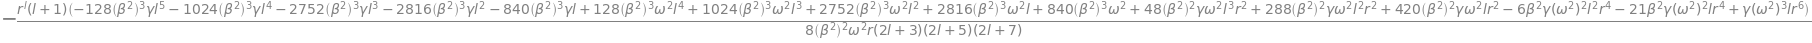

DIFF


~~~
	sol3
Incomp - on final


Incomp - on initk


DIFF


~~~






In [33]:
def incomp(expr):
    expr = expr.subs(alpha2, (lame + 2 * shear) / density)
    expr = expr.subs(lame, bulk - Rational(2, 3) * shear)
    expr = expand(expr)
    expr = limit(expr, bulk, oo, '+')
    return simplify(expr)
    
f_kpos = (beta2 * k_pos - w2) / gamma
f_kneg = (beta2 * k_neg - w2) / gamma
k_pos_incom = incomp(k_pos)
k_neg_incom = incomp(k_neg)

# print('k2 * f(k+) * a2')
# disp(incomp(k_pos * f_kpos * alpha2))
# print('f(k+)')
# disp(incomp(f_kpos))
# print('k+ * a2')
# disp(incomp(k_pos * alpha2))
# print('k2')
# disp(incomp(k_pos))
# print()
# print('k2 * f(k-) * a2')
# disp(incomp(k_neg * f_kneg * alpha2))
# print('f(k-)')
# disp(incomp(f_kneg))
# print('k- * a2')
# disp(incomp(k_neg * alpha2))
# print('k2')
# disp(incomp(k_neg))

y_reg = find_ys(k_pos, k_neg)
y_incom = find_ys(k_pos_incom, k_neg_incom)
                    

# FirstOff = True
for (yi, sols), (yi_incom, sols_incom)  in zip(y_reg.items(), y_incom.items()):
    disp(yi)
    for (soli, sol), (soli_incom, sol_incom) in zip(sols.items(), sols_incom.items()):
        print(soli)
        #print('Full')
        #disp(factor(sol))
        print('Incomp - on final')
        sol_incom = factor(incomp(expand(sol)))
        disp(sol_incom)
        print('Incomp - on initk')
        sol_incom_k_incom = factor(incomp(sol_incom))
        disp(sol_incom_k_incom)
        print('DIFF')
        disp(simplify(sol_incom - sol_incom_k_incom))
        print('~~~')
        
    print('\n\n\n')

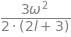

In [41]:
f_kpos = (beta2 * k_pos - w2) / gamma
f_kneg = (beta2 * k_neg - w2) / gamma

h_kpos = f_kpos - (l + 1)
h_kneg = f_kneg - (l + 1)


y5_t1_neg = (alpha2 * f_kneg - (l + 1) * beta2) / r**2
y5_t2_neg = (-3 * gamma * f_kneg) * Psi_approx(k_neg, l) / (2 * (2 * l + 3))

expr = alpha2 * f_kneg
expr = expr.subs(alpha2, (lame + 2 * shear) / density)
expr = expr.subs(lame, bulk - Rational(2, 3) * shear)
disp(incomp(f_kneg))
disp(incomp(y5_t1_neg))
disp(incomp(y5_t2_neg))
disp(incomp(y5_t1_neg + y5_t2_neg))


Negative Sol k2


Positive Sol k2


'$y_{1}$'

	sol1


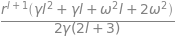

	sol2


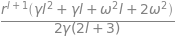

	sol3


'$y_{2}$'

	sol1


	sol2


	sol3


'$y_{3}$'

	sol1


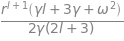

	sol2


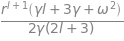

	sol3


'$y_{4}$'

	sol1


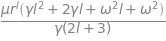

	sol2


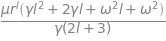

	sol3


'$y_{5}$'

	sol1


	sol2


KeyboardInterrupt: 

In [13]:
def incomp_static(expr):
    a2_exp = (bulk - Rational(2, 3) * shear + 2 * shear) / density
    expr = expr.subs(alpha2, a2_exp)
    expr = expr.subs(lame, bulk - Rational(2, 3) * shear)
    expr = expr.subs(beta2, shear /density)
    expr = limit(expr, w2, 0)
    expr = limit(expr, bulk, oo)
    return simplify(expr)
    

k_pos_incomst = incomp_static(k_pos)
k_neg_incomst = incomp_static(k_neg)

print('Negative Sol k2')
disp(k_neg_incomst)
print('Positive Sol k2')
disp(k_pos_incomst)

y_liqst = find_ys(k_pos_incomst, k_neg_incomst)
                    
                    
for yi, sols in y_liqst.items():
    disp(yi)
    for soli, sol in sols.items():
        print(soli)
        disp(factor(incomp_static(sol)))

### Shear goes to zero (liquid limit)

Negative Sol k2


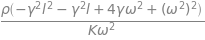

Positive Sol k2


'$y_{1}$'

	sol1


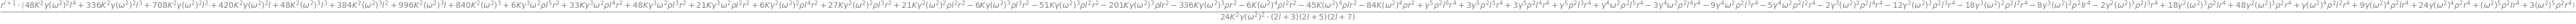

	sol2


nan

	sol3


'$y_{2}$'

	sol1


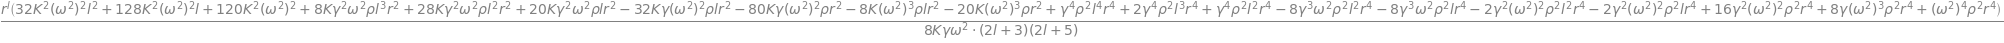

	sol2


nan

	sol3


'$y_{3}$'

	sol1


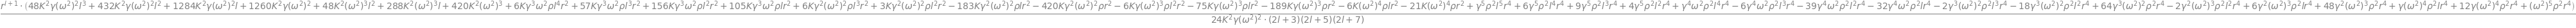

	sol2


nan

	sol3


'$y_{4}$'

	sol1


	sol2


nan

	sol3


'$y_{5}$'

	sol1


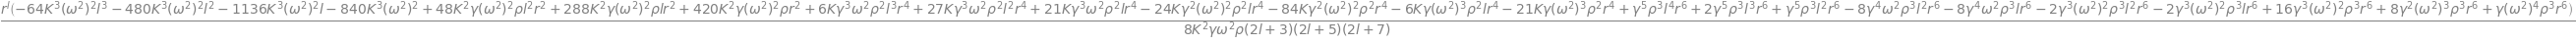

	sol2


nan

	sol3


'$y_{6}$'

	sol1


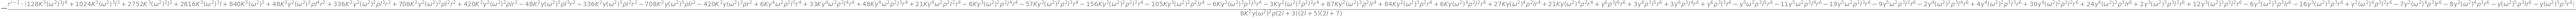

	sol2


nan

	sol3


In [26]:
def liquid(expr):
    a2_exp = (bulk - Rational(2, 3) * shear + 2 * shear) / density
    expr = expr.subs(alpha2, a2_exp)
    expr = expr.subs(lame, bulk - Rational(2, 3) * shear)
    expr = expr.subs(beta2, shear /density)
    expr = limit(expr, shear, 0)
    return simplify(expr)
    

k_pos_liq = liquid(k_pos)
k_neg_liq = liquid(k_neg)

print('Negative Sol k2')
disp(k_neg_liq)
print('Positive Sol k2')
disp(k_pos_liq)

y_liq = find_ys(k_pos_liq, k_neg_liq)
                    
                    
for yi, sols in y_liq.items():
    disp(yi)
    for soli, sol in sols.items():
        print(soli)
        disp(factor(liquid(sol)))

### Static Limit for Liquid

In [27]:
def liquid_static(expr):
    a2_exp = (bulk - Rational(2, 3) * shear + 2 * shear) / density
    expr = expr.subs(alpha2, a2_exp)
    expr = expr.subs(lame, bulk - Rational(2, 3) * shear)
    expr = expr.subs(beta2, shear /density)
    expr = limit(expr, shear, 0)
    expr = limit(expr, w2, 0)
    return simplify(expr)
    

k_pos_liqst = liquid_static(k_pos)
k_neg_liqst = liquid_static(k_neg)

print('Negative Sol k2')
disp(k_neg_liqst)
print('Positive Sol k2')
disp(k_pos_liqst)

y_liqst = find_ys(k_pos_liqst, k_neg_liqst)
                    
                    
for yi, sols in y_liqst.items():
    disp(yi)
    for soli, sol in sols.items():
        print(soli)
        disp(factor(liquid_static(sol)))

Negative Sol k2


⎧                    2        
⎪     nan       for l  + l = 0
⎪                             
⎨-∞⋅l⋅(l + 1)                 
⎪─────────────    otherwise   
⎪ │l⋅(l + 1)│                 
⎩                             

Positive Sol k2


'$y_{1}$'

	sol1


           ⎧                                                                  
           ⎪                                                                  
           ⎪                                                                  
           ⎪                         6                                        
    lim    ⎨                      ∞⋅l                                         
\omega²─→0⁺⎪──────────────────────────────────────────────── + ───────────────
           ⎪   7       6        5        4        3        2      7       6   
           ⎪8⋅l  + 76⋅l  + 270⋅l  + 449⋅l  + 352⋅l  + 105⋅l    8⋅l  + 76⋅l  + 
           ⎩                                                                  

                                                                              
                                                                              
                                                                              
     5 │ 2    │                                    

	sol2


nan

	sol3


'$y_{2}$'

	sol1


nan

	sol2


nan

	sol3


'$y_{3}$'

	sol1


⎧                                                                             
⎪                                                                             
⎪                                                                             
⎪                                         5                                   
⎨                                      ∞⋅l                                    
⎪─────────────────────────────────────────────────────────────────────────────
⎪   4 │ 2    │       3 │ 2    │        2 │ 2    │         │ 2    │       │ 2  
⎪8⋅l ⋅│l  + l│ + 68⋅l ⋅│l  + l│ + 202⋅l ⋅│l  + l│ + 247⋅l⋅│l  + l│ + 105⋅│l  +
⎩                                                                             

                                                                              
                                                                              
                                                                              
                                               3   

	sol2


nan

	sol3


'$y_{4}$'

	sol1


nan

	sol2


nan

	sol3


'$y_{5}$'

	sol1


nan

	sol2


nan

	sol3


'$y_{6}$'

	sol1


nan

	sol2


nan

	sol3


## Kamata IC

In [3]:
def zn(x2, n=2):
    
    max_l = 10
    z = x2 / (2 * max_l + 3)
    for l_ in range(n, max_l)[::-1]:
        z = x2 / ((2 * l_ + 1) - z)
        
    return z

k2 = Symbol('k_{2}')
z_pos = zn(k_pos * r**2)
#z_neg = zn(k_neg * r**2)

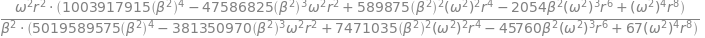

In [4]:
disp(simplify(limit(z_pos, alpha2, oo)))

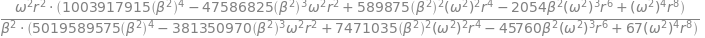

In [5]:
disp(simplify(limit(z_pos, alpha2, oo)))

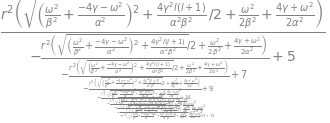

In [6]:
x = Symbol('x^{2}')
z_pos_2 = z_pos.subs(k2 * r**2, x)
disp(series(z_pos_2, x, 0))

In [ ]:
def find_ys_kamata(kpos, kneg):
    
    f_kpos_ = (beta2 * kpos - w2) / gamma
    f_kneg_ = (beta2 * kneg - w2) / gamma

    h_kpos_ = f_kpos_ - (l + 1)
    h_kneg_ = f_kneg_ - (l + 1)
    
    z_pos = zn(kpos * r**2)
    z_neg = zn(kneg * r**2)
    
    y1_s1 = -f_k_pos_ * z_pos / r
    y1_s2 = -f_k_neg_ * z_neg / r
    y1_s3 = l / r

    y2_s1 = -density * f_kpos_ * alpha**2 * kpos + 2 * shear * (2 * f_kpos_ + l * (l + 1)) * z_pos / r**2
    y2_s2 = -density * f_kneg_ * alpha**2 * kneg + 2 * shear * (2 * f_kneg_ + l * (l + 1)) * z_neg / r**2
    y2_s3 = 2 * shear * l * (l - 1) / r**2
    
    y3_s1 = z_pos / r
    y3_s2 = z_neg / r
    y3_s3 = 1 / r
    
    y4_s1 = shear * kpos - 2 * shear * (f_kpos_ + 1) * z_pos / r**2
    y4_s2 = shear * kneg - 2 * shear * (f_kneg_ + 1) * z_neg / r**2
    y4_s3 = 2 * shear (l - 1) / r**2
    
    y5_s1 = 3 * gamma * f_kpos_ - h_kpos_ * (l * gamma - w2)
    y5_s2 = 3 * gamma * f_kneg_ - h_kneg_ * (l * gamma - w2)
    y5_s3 = l * gamma - w2
    
    y6_s1 = (2 * l + 1) * y5_s1 / r
    y6_s2 = (2 * l + 1) * y5_s2 / r
    y6_s1 = (2 * l + 1) * y5_s3 / r - 3 * l * gamma / r

    ys = {
        '$y_{1}$': {
            '\tsol1': y1_s1,
            '\tsol2': y1_s2,
            '\tsol3': y1_s3
        },
        '$y_{2}$': {
            '\tsol1': y2_s1,
            '\tsol2': y2_s2,
            '\tsol3': y2_s3
        },
        '$y_{3}$': {
            '\tsol1': y3_s1,
            '\tsol2': y3_s2,
            '\tsol3': y3_s3
        },
        '$y_{4}$': {
            '\tsol1': y4_s1,
            '\tsol2': y4_s2,
            '\tsol3': y4_s3
        },
        '$y_{5}$': {
            '\tsol1': y5_s1,
            '\tsol2': y5_s2,
            '\tsol3': y5_s3
        },
        '$y_{6}$': {
            '\tsol1': y6_s1,
            '\tsol2': y6_s2,
            '\tsol3': y6_s3
        }
    }
    
    return ys

### Incompressiblity

k2_pos


f_kpos


f_kpos a2 k2


k2_neg


k2_neg a2


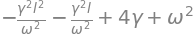

f_kneg


In [11]:
k_inner_nonsqrt = ((w2 + 4 * gamma) / alpha2) + (w2 / beta2)
k_inner_sqrt = ((w2 / beta2) - ((w2 + 4 * gamma) / alpha2))**2 + ((4 * l * (l + 1) * gamma**2) / (alpha2 * beta2))
k_pos = Rational(1, 2) * (k_inner_nonsqrt + sqrt(k_inner_sqrt))
k_neg = Rational(1, 2) * (k_inner_nonsqrt - sqrt(k_inner_sqrt))

f_pos = (beta2 * k_pos - w2) / gamma
f_neg = (beta2 * k_neg - w2) / gamma

def incomp(expr):
    expr = limit(expr, alpha2, oo, '+')
    expr = limit(expr, lame, oo, '+')
    expr = limit(expr, bulk, oo, '+')
    return simplify(expr)

print('INCOMP')
print('k2_pos')
disp(incomp(k_pos))

print('f_kpos')
disp(incomp(f_pos))

print('f_kpos a2 k2')
disp(incomp(expand(f_kpos * alpha2 * k_pos)))

print('k2_neg')
disp(incomp(k_neg))

print('k2_neg a2')
disp(incomp(expand(k_neg * alpha2)))

print('f_kneg')
disp(incomp(expand(f_kneg)))

